<a href="https://colab.research.google.com/github/LeoBR01/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

#### **Aluno: Leonardo Brasil de Almeida**
---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Os dados foram coletados do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) para análise da cidade de Tokyo no Japão.

In [13]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-03-27/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [15]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11000,3,165,2020-03-04,1.42,1,363
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7677,3,228,2020-01-18,2.25,1,148
2,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.71019,139.69755,Entire home/apt,5200,30,93,2019-11-25,0.94,2,0
3,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65800,139.67134,Private room,4000,1,211,2020-03-16,2.17,1,0
4,1033276,private room @Senju area,5686404,NaN,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-06-17,0.75,2,271


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [22]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {} \n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 11197
Variáveis:	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

##### Ao analisar a cidade de tokyo e seus dados faltantes, podemos notar que existem certas colunas que são totalmente descartáveis na hora de trabalharmos com os dados, visto que a quantidade de dados faltantes é muito grande ou praticamente **100%** dos dados

In [33]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.183621
last_review                       0.183621
host_name                         0.027239
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

##### Nessa distribuição, encontramos algumas incoerencias claras em que **outliers** implicam numa projeção dos nosso histogramas de maneira incorreta. Levando muitas vezes a valores que não condizem com a realidade. Nesse caso, devemos aprender a limpar esses dados que induzem valores incorretos.

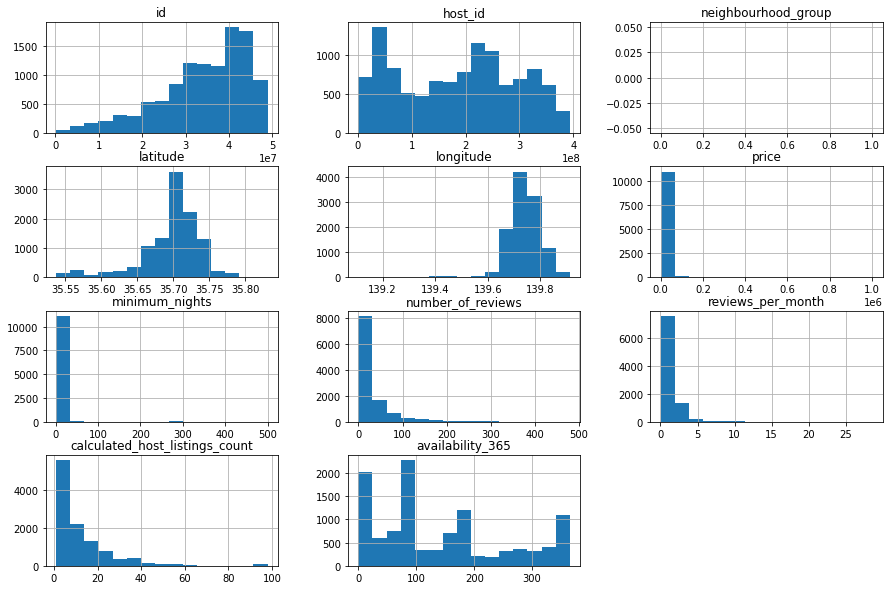

In [41]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [51]:
# ver a média da coluna `price`
df[['price','minimum_nights']].describe()

,price,minimum_nights
count,11197.000000,11197.000000
mean,12843.618826,3.739841
std,32150.627375,18.345848
min,0.000000,1.000000
25%,4500.000000,1.000000
50%,7800.000000,1.000000
75%,13000.000000,2.000000
max,1000000.000000,500.000000


### **Q4.1. Grafico de box-plot?**
#### De um exemplo de um coluna

##### O grafico Box-Plot nos auxilia com uma visão ampla de como indentificar outliers e como trata-los. Fica evidente que postos discrepantes irão danificar a projeção dos nossos dados, como vimos nos histogramas acima.

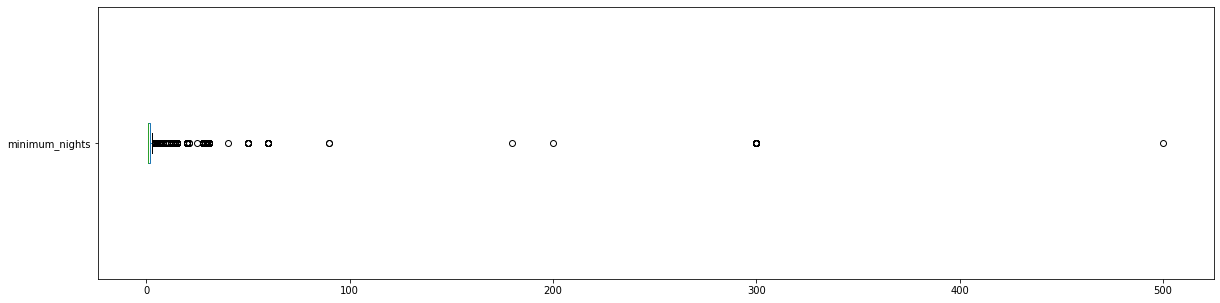

Minimum_nights: Valores acima de 30:
64 entradas
0.5716%


In [61]:
# minimum_nights
df.minimum_nights.plot(kind='box',vert = False, figsize=(20,5))
plt.show()

print('Minimum_nights: Valores acima de 30:')
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30])/ df.shape[0])*100))

## Histogramas sem outliers ##

###Limpando os arquivos e plotando###

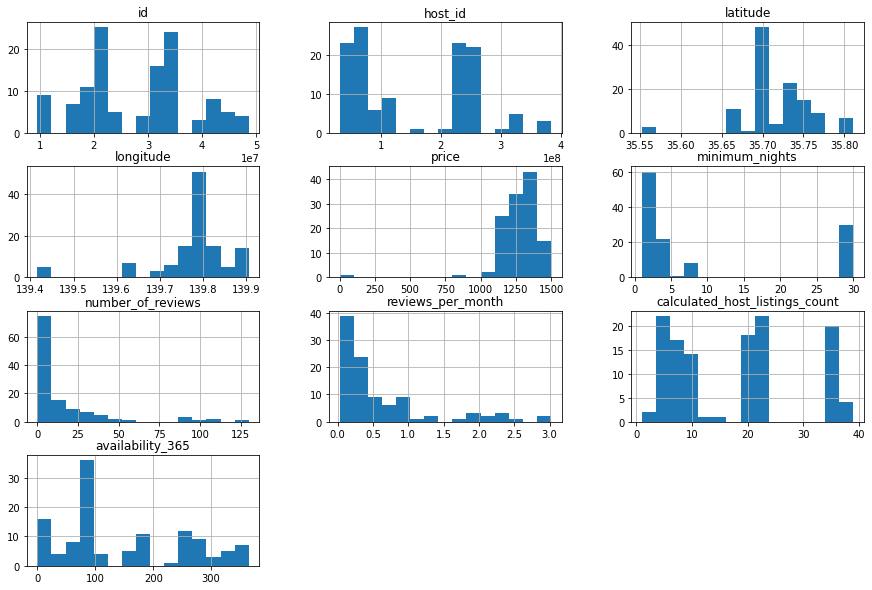

In [62]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

In [67]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.209786,0.055108,0.184517,-0.096560,0.386571
minimum_nights,-0.209786,1.000000,-0.218014,-0.326713,0.025073,-0.162200
number_of_reviews,0.055108,-0.218014,1.000000,0.823484,-0.306690,-0.297845
reviews_per_month,0.184517,-0.326713,0.823484,1.000000,-0.164623,-0.254062
calculated_host_listings_count,-0.096560,0.025073,-0.306690,-0.164623,1.000000,-0.308367
availability_365,0.386571,-0.162200,-0.297845,-0.254062,-0.308367,1.000000


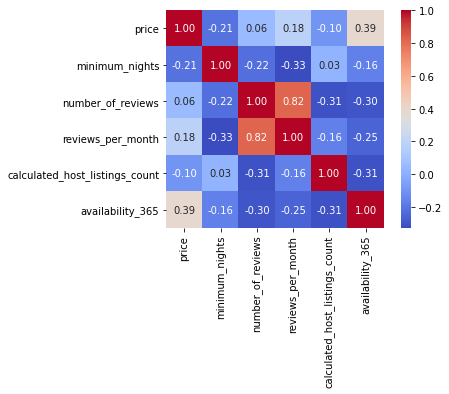

In [69]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap='coolwarm',fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [76]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Private room       61
Shared room        57
Hotel room          2
Entire home/apt     1
Name: room_type, dtype: int64

In [77]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.504132
Shared room        0.471074
Hotel room         0.016529
Entire home/apt    0.008264
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [97]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Kokubunji Shi    1500.000000
Taito Ku         1473.250000
Chiyoda Ku       1459.000000
Arakawa Ku       1389.800000
Hino Shi         1371.000000
Toshima Ku       1319.400000
Edogawa Ku       1316.500000
Nerima Ku        1271.428571
Chuo Ku          1263.142857
Sumida Ku        1259.613636
Name: price, dtype: float64

#### A princípio numa primeira análise, os imoveis na região de Kokubunji Shi, seriam os mais caros de Tokyo. Entretanto, devemos analisar a quantidade de entradas que temos em cada região para saber se nossa média está compativel com as demais localidades ou temos pontos isolados.

#### Avaliar numeros sem comparar com outros é um grande erro de análise, numeros soltos não são parametros de nada, quando observados de 1 ponto de vista.

In [109]:
#quantidade de casas naquela dada regiao
df_clean['neighbourhood'].value_counts()

Sumida Ku        44
Katsushika Ku    22
Adachi Ku        10
Chuo Ku           7
Nerima Ku         7
Edogawa Ku        6
Toshima Ku        5
Arakawa Ku        5
Hino Shi          4
Taito Ku          4
Ota Ku            3
Chiyoda Ku        2
Kokubunji Shi     1
Shibuya Ku        1
Name: neighbourhood, dtype: int64

In [110]:
# ver quantidade de imóveis no Kokubunji Shi
print(df_clean[df_clean.neighbourhood == "Kokubunji Shi"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Kokubunji Shi"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11161,48611867,Tiny room 6（予約前に必ず部屋のサイズを確認）東京郊外 中央線で新宿から30分の国立駅,163276166,KeitA,Kokubunji Shi,35.70185,139.43363,Private room,1500,1,0,NaN,NaN,7,89


#### Conseguimos avaliar com clareza que apesar da média de valores em Kokubunji Shi ser a maior, a quantidade de imoveis disponiveis é muito menor que as demais localidades. O que nos levar a considerar que existem regiões que tem uma maior quantidade de imoveis com uma média rasoavelmente alta, como é o caso de `Sumida Ku` , que possui `44` imoveis com uma media de `1259.613636`

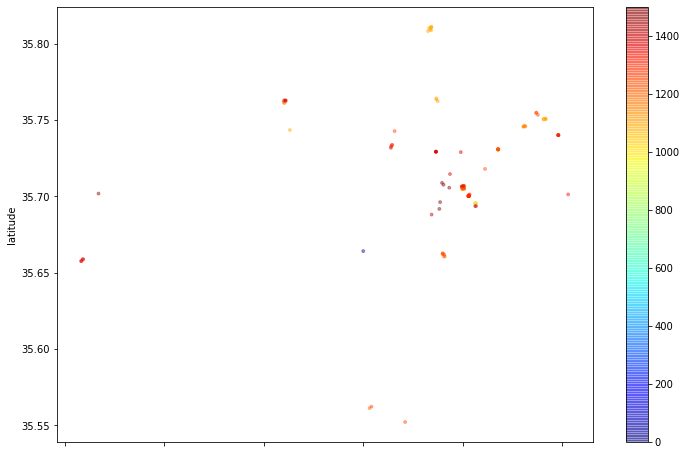

In [111]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [113]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

9.03305785123967

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.